In [1]:
import vitaldb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
case_id = 1
ecg_track_name = 'SNUADC/ECG_II'
interval = 1 / 100
blob_duration = 310
blob_size = int(blob_duration / interval)

In [3]:
vf = vitaldb.VitalFile(case_id, [ecg_track_name])
ecg_signal = vf.to_numpy([ecg_track_name], interval=interval)[:, 0]


In [4]:
blobs = [ecg_signal[i:i + blob_size][:30000] for i in range(0, len(ecg_signal), blob_size)]
output_dir = "./output_blobs"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, blob in enumerate(blobs, 1):
    blob_df = pd.DataFrame({'ECG': blob})
    blob_df.to_csv(f"{output_dir}/subject_1_blob_{i}.csv", index=False)

print(f"Número total de blobs gerados: {len(blobs)}")

Número total de blobs gerados: 38


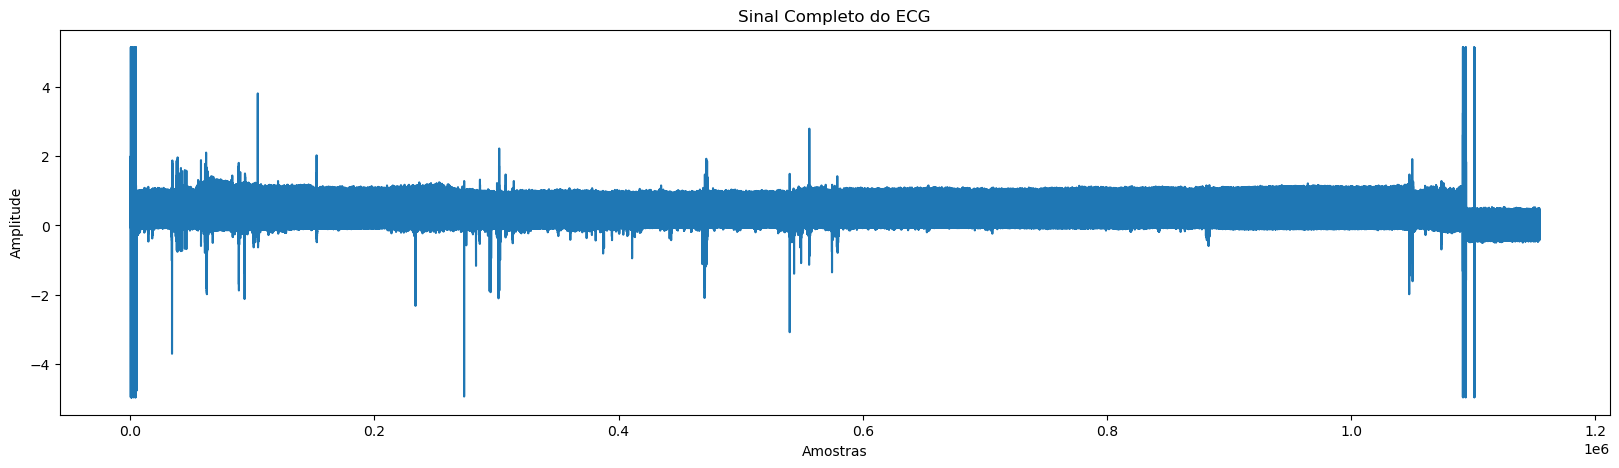

In [5]:
plt.figure(figsize=(20, 5))
plt.plot(ecg_signal)
plt.title('Sinal Completo do ECG')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

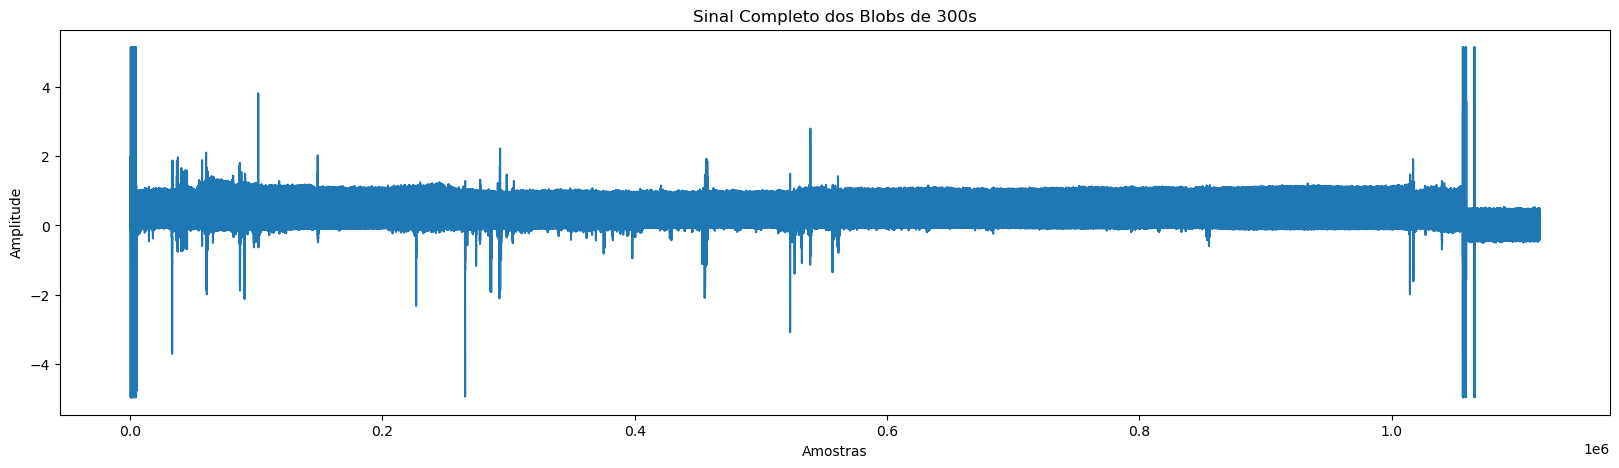

In [6]:
merged_ecg_signal = np.concatenate(blobs)
plt.figure(figsize=(20, 5))
plt.plot(merged_ecg_signal)
plt.title('Sinal Completo dos Blobs de 300s')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()


In [7]:
total_time_seconds_original = len(ecg_signal) * interval
print(f"Tempo total do sinal original: {total_time_seconds_original} segundos")

total_time_seconds_blobs = len(merged_ecg_signal) * interval
print(f"Tempo total do sinal com blobs: {total_time_seconds_blobs} segundos")

Tempo total do sinal original: 11541.1 segundos
Tempo total do sinal com blobs: 11171.1 segundos


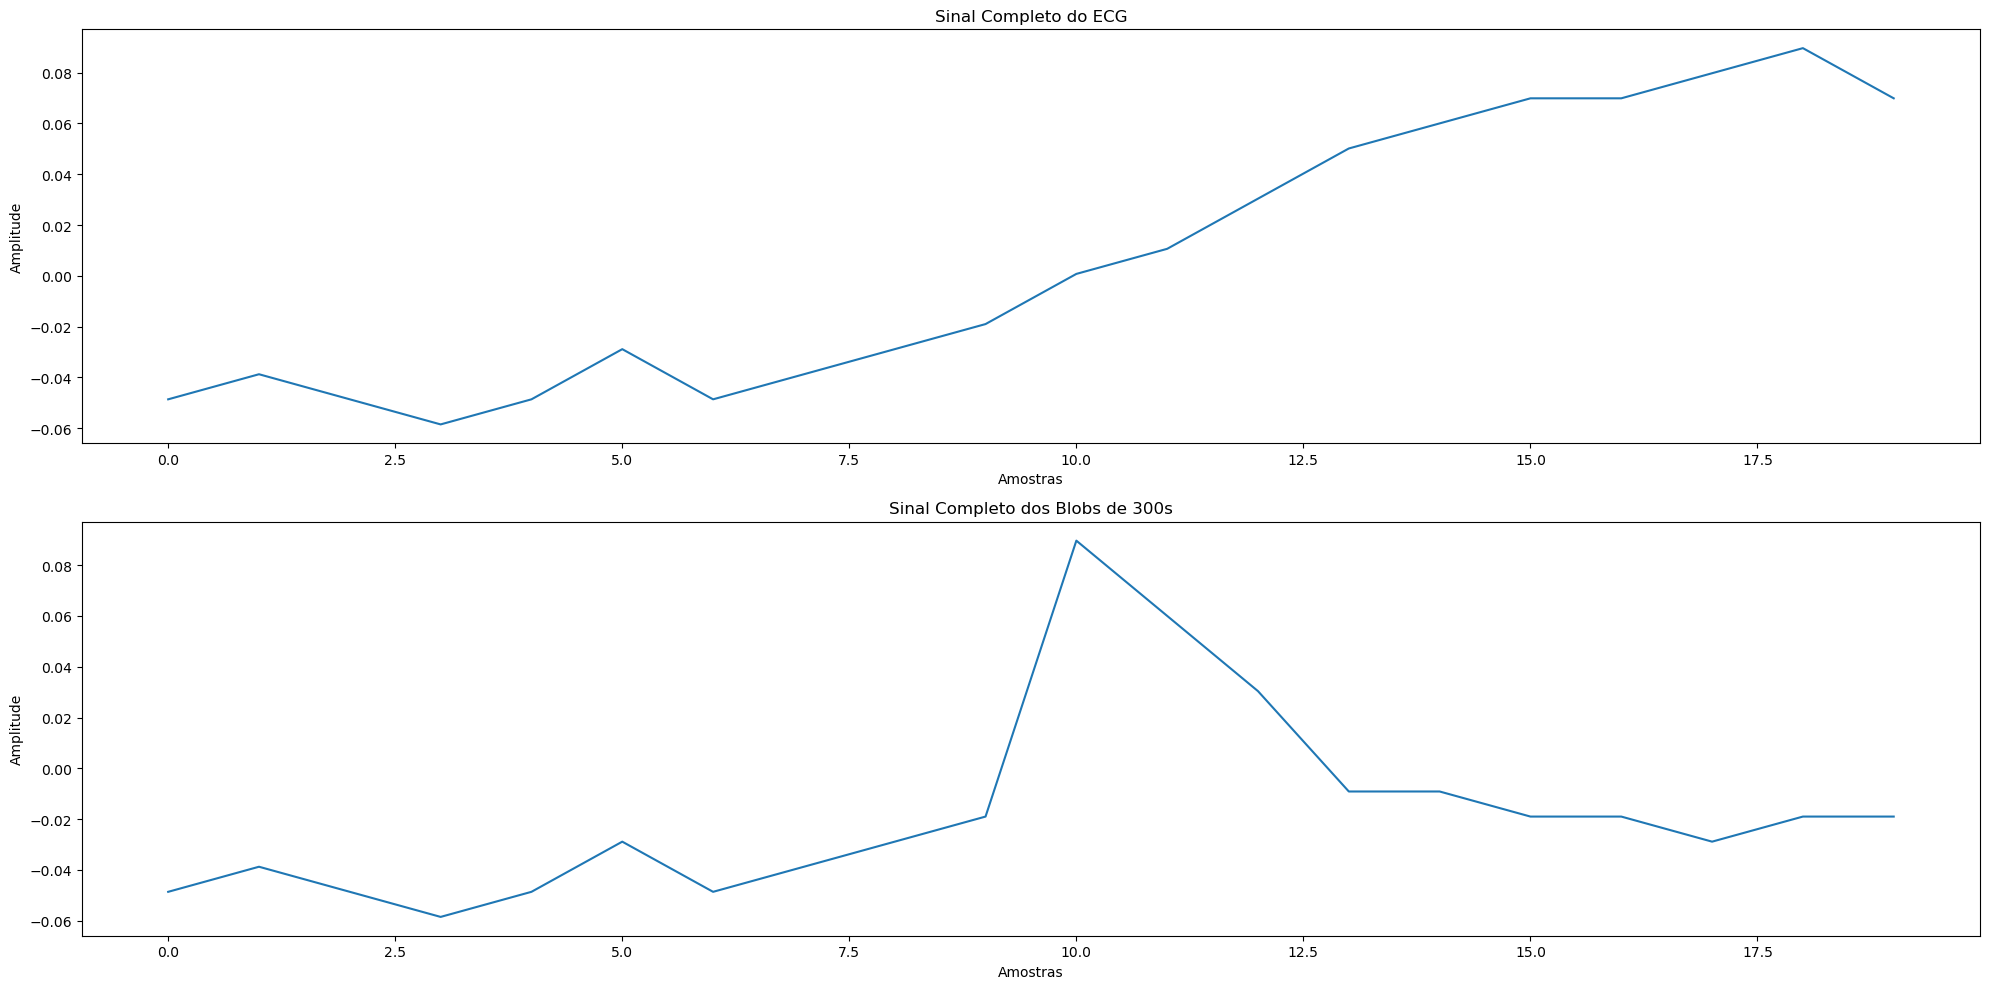

In [9]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(ecg_signal[29990:30010])
plt.title('Sinal Completo do ECG')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')


merged_ecg_signal = np.concatenate(blobs)
plt.subplot(2, 1, 2) 
plt.plot(merged_ecg_signal[29990:30010])
plt.title('Sinal Completo dos Blobs de 300s')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
